<div style="float:right; padding-top: 15px; padding-right: 15px">
    <div>
        <a href="https://whiteboxml.com">
            <img src="https://whiteboxml.com/static/img/logo/black_bg_white.svg" width="250">
        </a>
    </div>
</div>

# Natural Language Processing

In [1]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter('ignore')

## 1. data loading

list of titles of best 100 films ever made...

In [2]:
titles = open('data/title_list.txt').read().split('\n')[0:100]

titles[:15]

['The Godfather',
 'The Shawshank Redemption',
 "Schindler's List",
 'Raging Bull',
 'Casablanca',
 "One Flew Over the Cuckoo's Nest",
 'Gone with the Wind',
 'Citizen Kane',
 'The Wizard of Oz',
 'Titanic',
 'Lawrence of Arabia',
 'The Godfather: Part II',
 'Psycho',
 'Sunset Blvd.',
 'Vertigo']

In [3]:
synopses = list(map(lambda x: x.lstrip(' Plot  [edit]  [  [  edit  edit  ]  ]  \n ').strip(), open('data/synopses_list.txt').read().split('\n BREAKS HERE')[0:100]))

synopses[:3]

['On the day of his only daughter\'s wedding, Vito Corleone hears requests in his role as the Godfather, the Don of a New York crime family. Vito\'s youngest son, Michael, in a Marine Corps uniform, introduces his girlfriend, Kay Adams, to his family at the sprawling reception. Vito\'s godson Johnny Fontane, a popular singer, pleads for help in securing a coveted movie role, so Vito dispatches his consigliere, Tom Hagen, to Los Angeles to influence the abrasive studio head, Jack Woltz. Woltz is unmoved until the morning he wakes up in bed with the severed head of his prized stallion.  On the day of his only daughter\'s wedding,   Vito Corleone  Vito Corleone   hears requests in his role as the Godfather, the   Don  Don   of a New York crime family. Vito\'s youngest son,   Michael  Michael  , in a   Marine Corps  Marine Corps   uniform, introduces his girlfriend,   Kay Adams  Kay Adams  , to his family at the sprawling reception. Vito\'s godson   Johnny Fontane  Johnny Fontane  , a popu

## 2. data processing

```
pip install spacy
python -m spacy download en_core_web_sm
```

In [4]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [5]:
tokens = nlp("Apple is looking at buying U.K. startup for $1 billion")

for token in tokens:
    print(token.text, token.lemma_, token.pos_)

Apple Apple PROPN
is be AUX
looking look VERB
at at ADP
buying buy VERB
U.K. U.K. PROPN
startup startup NOUN
for for ADP
$ $ SYM
1 1 NUM
billion billion NUM


More info about lemmatization and stemming:

https://www.datacamp.com/community/tutorials/stemming-lemmatization-python

In [6]:
import re

def spacy_tokenizer(sentence):

    tokens = nlp(sentence)
    
    filtered_tokens = []
    for token in tokens:
        if not token.is_stop:
            lemma = token.lemma_.lower().strip()
        
            if re.search('^[a-zA-Z]+$', lemma):
                filtered_tokens.append(lemma)

    return filtered_tokens

In [7]:
spacy_tokenizer(synopses[0])[:15]

['day',
 'daughter',
 'wedding',
 'vito',
 'corleone',
 'hear',
 'request',
 'role',
 'godfather',
 'don',
 'new',
 'york',
 'crime',
 'family',
 'vito']

## 3. term-frequency matrix

More info:

https://medium.com/analytics-vidhya/tf-idf-term-frequency-technique-easiest-explanation-for-text-classification-in-nlp-with-code-8ca3912e58c3

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df=0.15, tokenizer=spacy_tokenizer)
tfidf_matrix = tfidf_vectorizer.fit_transform(synopses)

tfidf_matrix.shape

(100, 288)

In [9]:
tfidf_matrix.todense()

matrix([[0.        , 0.18319713, 0.06691941, ..., 0.08739497, 0.12882323,
         0.04531463],
        [0.        , 0.        , 0.        , ..., 0.09152069, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.04832793],
        [0.08892894, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.37235357, ..., 0.08104731, 0.        ,
         0.08404669]])

In [10]:
terms = tfidf_vectorizer.get_feature_names()

terms[:15]

['able',
 'accept',
 'act',
 'admit',
 'affair',
 'agree',
 'air',
 'allow',
 'american',
 'apartment',
 'appear',
 'approach',
 'arm',
 'army',
 'arrange']

In [11]:
import pandas as pd

tfidf_df = pd.DataFrame(data=tfidf_matrix.todense(), columns=terms, index=titles)

tfidf_df.head()

,able,accept,act,admit,affair,agree,air,allow,american,apartment,...,win,window,witness,woman,work,world,wound,year,york,young
The Godfather,0.0,0.183197,0.066919,0.000000,0.000000,0.045878,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.087395,0.128823,0.045315
The Shawshank Redemption,0.0,0.000000,0.000000,0.074588,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.099793,0.058983,0.0,0.091521,0.000000,0.000000
Schindler's List,0.0,0.000000,0.000000,0.000000,0.000000,0.050304,0.000000,0.121652,0.000000,0.0,...,0.073375,0.0,0.066957,0.055064,0.000000,0.154394,0.0,0.000000,0.000000,0.000000
Raging Bull,0.0,0.000000,0.000000,0.000000,0.137157,0.000000,0.068578,0.000000,0.088194,0.0,...,0.128865,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.042073,0.186053,0.000000
Casablanca,0.0,0.000000,0.000000,0.000000,0.000000,0.053114,0.000000,0.064224,0.070697,0.0,...,0.000000,0.0,0.000000,0.000000,0.055162,0.000000,0.0,0.000000,0.000000,0.000000


In [12]:
from sklearn.metrics.pairwise import cosine_distances

dist_df = pd.DataFrame(cosine_distances(tfidf_df))

dist_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000,0.788746,0.851908,0.739626,0.790818,0.875028,0.688119,0.813804,0.791238,0.862377,...,0.738718,0.847321,0.766871,0.848077,0.749628,0.696510,0.835634,0.755126,0.819960,0.852954
1,0.788746,0.000000,0.729600,0.864775,0.771263,0.769841,0.760952,0.772176,0.754558,0.891535,...,0.742042,0.835099,0.805533,0.869946,0.794106,0.888161,0.885181,0.739590,0.805947,0.879726
2,0.851908,0.729600,0.000000,0.798791,0.764590,0.800558,0.719355,0.763794,0.809819,0.815070,...,0.848199,0.825966,0.721875,0.841085,0.824757,0.902016,0.856894,0.800273,0.818134,0.811993
3,0.739626,0.864775,0.798791,0.000000,0.783826,0.772978,0.724279,0.670128,0.823514,0.823722,...,0.823685,0.833477,0.770836,0.728918,0.689759,0.815367,0.803911,0.769091,0.788745,0.850756
4,0.790818,0.771263,0.764590,0.783826,0.000000,0.715025,0.690213,0.788019,0.711129,0.792827,...,0.699054,0.755596,0.740181,0.735226,0.617707,0.710259,0.753107,0.620260,0.636826,0.765065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.696510,0.888161,0.902016,0.815367,0.710259,0.852075,0.792199,0.852894,0.896048,0.863132,...,0.709811,0.687634,0.794602,0.836549,0.685024,0.000000,0.757835,0.677838,0.780340,0.860228
96,0.835634,0.885181,0.856894,0.803911,0.753107,0.675879,0.806785,0.828788,0.744215,0.857220,...,0.770952,0.703177,0.735045,0.705656,0.772936,0.757835,0.000000,0.597078,0.793947,0.899600
97,0.755126,0.739590,0.800273,0.769091,0.620260,0.707082,0.703356,0.811018,0.734294,0.785636,...,0.524953,0.707954,0.705449,0.764222,0.616385,0.677838,0.597078,0.000000,0.708419,0.881180
98,0.819960,0.805947,0.818134,0.788745,0.636826,0.694354,0.718538,0.764697,0.726643,0.787889,...,0.640152,0.746039,0.742320,0.734681,0.637378,0.780340,0.793947,0.708419,0.000000,0.868637


In [13]:
dist_df.shape

(100, 100)

## 4. text clustering

In [14]:
from umap import UMAP

umap = UMAP(n_neighbors=5, min_dist=0, random_state=42)
embedding = umap.fit_transform(dist_df)

embedding[:5,:]

array([[9.161142 , 5.8285255],
       [7.6823516, 5.780912 ],
       [3.2360282, 2.089524 ],
       [9.092538 , 9.207599 ],
       [7.5925856, 4.514887 ]], dtype=float32)

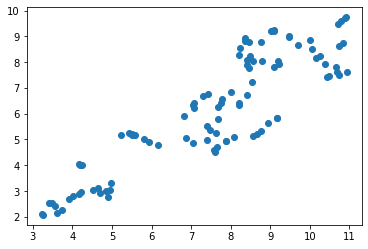

In [15]:
import matplotlib.pyplot as plt

plt.scatter(embedding[:,0], embedding[:,1]);

In [16]:
from hdbscan import HDBSCAN

hdbscan = HDBSCAN(min_cluster_size=5)
clustering = hdbscan.fit_predict(embedding)

pd.Series(clustering).unique()

array([1, 0])

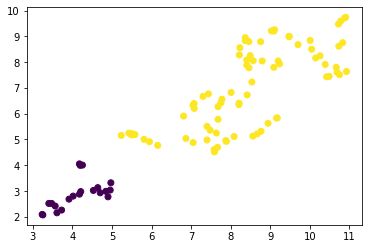

In [17]:
plt.scatter(embedding[:,0], embedding[:,1], c=clustering);

In [18]:
tfidf_df['cluster'] = clustering

tfidf_df.head()

,able,accept,act,admit,affair,agree,air,allow,american,apartment,...,window,witness,woman,work,world,wound,year,york,young,cluster
The Godfather,0.0,0.183197,0.066919,0.000000,0.000000,0.045878,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.087395,0.128823,0.045315,1
The Shawshank Redemption,0.0,0.000000,0.000000,0.074588,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.099793,0.058983,0.0,0.091521,0.000000,0.000000,1
Schindler's List,0.0,0.000000,0.000000,0.000000,0.000000,0.050304,0.000000,0.121652,0.000000,0.0,...,0.0,0.066957,0.055064,0.000000,0.154394,0.0,0.000000,0.000000,0.000000,0
Raging Bull,0.0,0.000000,0.000000,0.000000,0.137157,0.000000,0.068578,0.000000,0.088194,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.042073,0.186053,0.000000,1
Casablanca,0.0,0.000000,0.000000,0.000000,0.000000,0.053114,0.000000,0.064224,0.070697,0.0,...,0.0,0.000000,0.000000,0.055162,0.000000,0.0,0.000000,0.000000,0.000000,1


In [19]:
def get_df_from_cluster(cluster):
    return tfidf_df[tfidf_df['cluster'] == cluster].drop(columns='cluster')

get_df_from_cluster(0)

,able,accept,act,admit,affair,agree,air,allow,american,apartment,...,win,window,witness,woman,work,world,wound,year,york,young
Schindler's List,0.000000,0.000000,0.000000,0.000000,0.000000,0.050304,0.000000,0.121652,0.000000,0.000000,...,0.073375,0.000000,0.066957,0.055064,0.000000,0.154394,0.000000,0.000000,0.00000,0.000000
Lawrence of Arabia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071352,0.000000,...,0.078192,0.000000,0.000000,0.000000,0.000000,0.164528,0.000000,0.000000,0.00000,0.000000
The Sound of Music,0.040919,0.071694,0.039283,0.000000,0.000000,0.080794,0.000000,0.032565,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051303,0.00000,0.026601
Star Wars,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
The Bridge on the River Kwai,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.056442,0.046417,0.176158,0.078089,0.166490,0.000000,0.00000,0.000000
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.310267,0.087874,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.044610,0.000000,0.034609,0.00000,0.000000
Apocalypse Now,0.000000,0.000000,0.000000,0.000000,0.000000,0.112911,0.087648,0.068265,0.075145,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.058633,0.000000,0.147773,0.000000,0.00000,0.000000
The Lord of the Rings: The Return of the King,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.049262,0.000000,0.000000,0.058898,0.042864,0.00000,0.000000
Gladiator,0.053324,0.000000,0.000000,0.054486,0.000000,0.000000,0.000000,0.042437,0.000000,0.000000,...,0.204767,0.000000,0.000000,0.000000,0.000000,0.000000,0.045931,0.000000,0.00000,0.034665
Saving Private Ryan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.063037,0.312256,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.136456,0.000000,0.00000,0.000000


In [20]:
top_words_cluster = get_df_from_cluster(0).sum(axis=0).sort_values(ascending=False)

top_words_cluster.head()

army       2.928305
soldier    2.842963
war        2.728319
captain    2.272137
kill       2.152876
dtype: float64

<div style="padding-top: 25px; float: right">
    <div>    
        <i>&nbsp;&nbsp;© Copyright by</i>
    </div>
    <div>
        <a href="https://whiteboxml.com">
            <img src="https://whiteboxml.com/static/img/logo/black_bg_white.svg" width="125">
        </a>
    </div>
</div>